In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

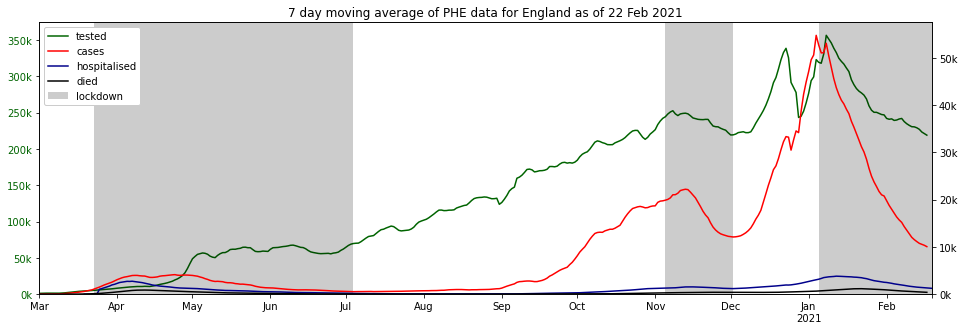

In [2]:
plot_summary(earliest_date='2020-03-01')

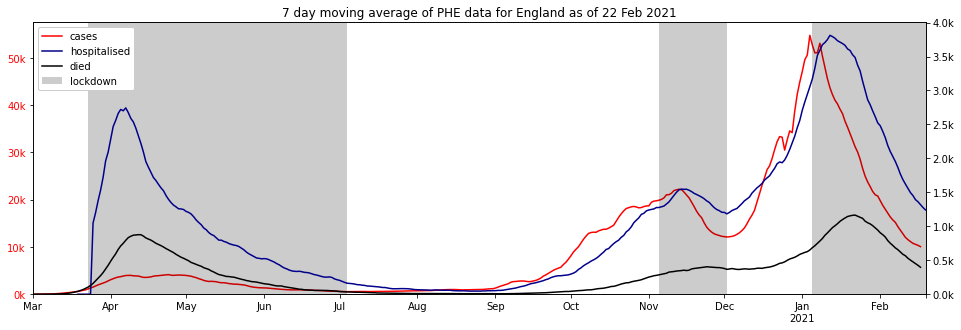

In [3]:
plot_summary(earliest_date='2020-03-01', left_series=(s.new_cases_sum,), 
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,513435.0,14958074.0,14444639.0,56286961,0.912174,25.662496,73.425330
1,Northern Ireland,N92000002,30796.0,458030.0,427234.0,1893667,1.626263,22.561200,75.812537
2,Scotland,S92000003,37342.0,1445488.0,1408146.0,5463300,0.683506,25.774642,73.541852
3,Wales,W92000004,42752.0,862248.0,819496.0,3152879,1.355967,25.991990,72.652043


'partial: 17,723,840'

'full: 624,325'

66796807

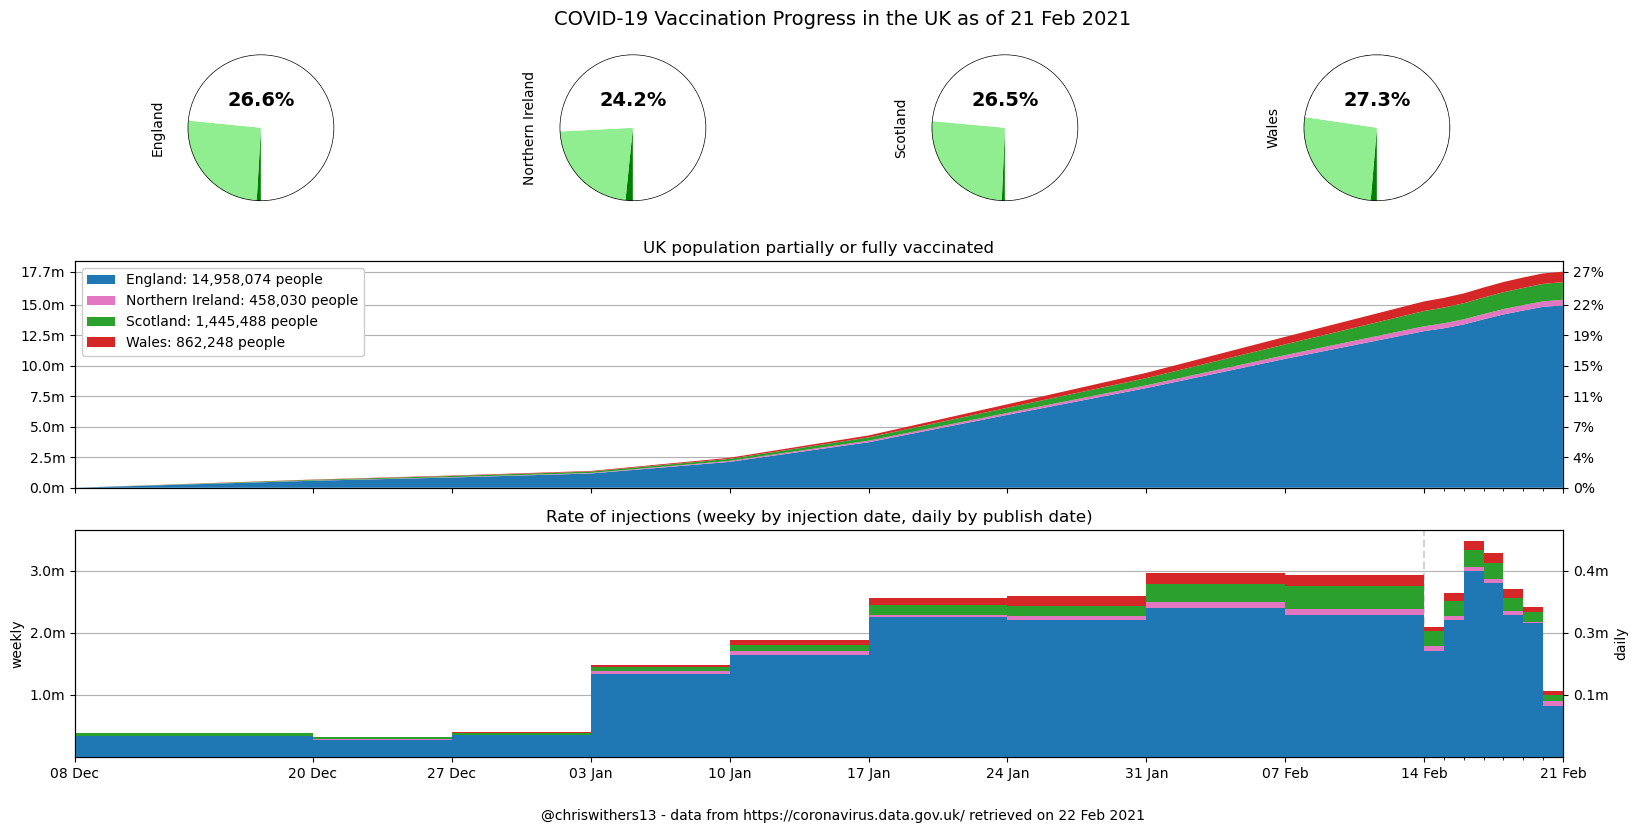

In [4]:
results = vaccination_dashboard()
display(results, f"partial: {results['any'].sum():,.0f}", f"full: {results['full'].sum():,.0f}", results['population'].sum())

In [5]:
vaccination_changes()

,,First Dose (New),Second Dose (Total),Complete (New),First Dose (Total),cumPeopleVaccinatedSecondDoseByPublishDate,Complete (Total)
,,,,,,,
England,21 Feb 21,"+113,987","+2,346","+2,346","+14,958,074","+513,435","+513,435"
Northern Ireland,21 Feb 21,"+12,021",-11,-11,"+458,030","+30,796","+30,796"
Scotland,21 Feb 21,"+13,546","+1,863","+1,863","+1,445,488","+37,342","+37,342"
Wales,21 Feb 21,"+2,165","+4,979","+4,979","+862,248","+42,752","+42,752"


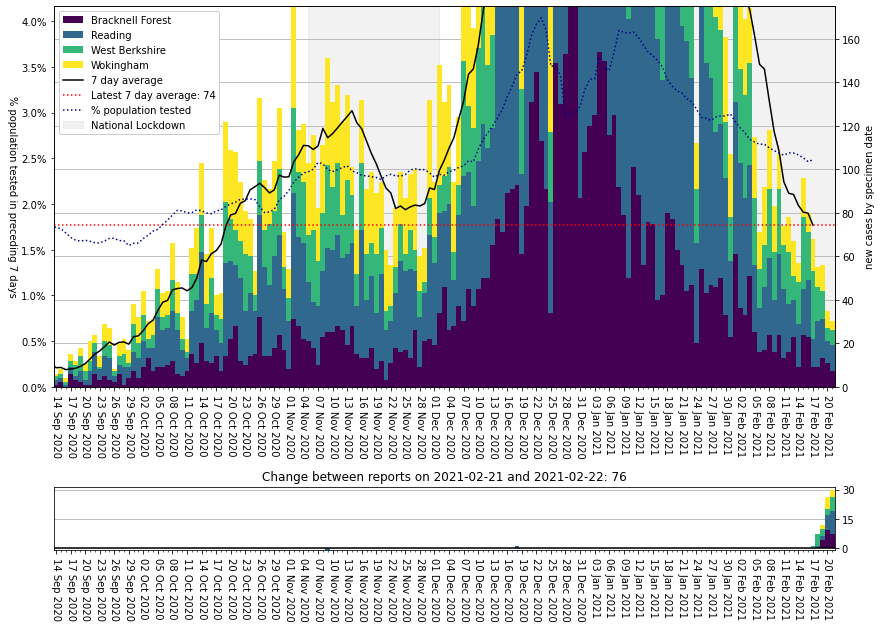

In [6]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=175)

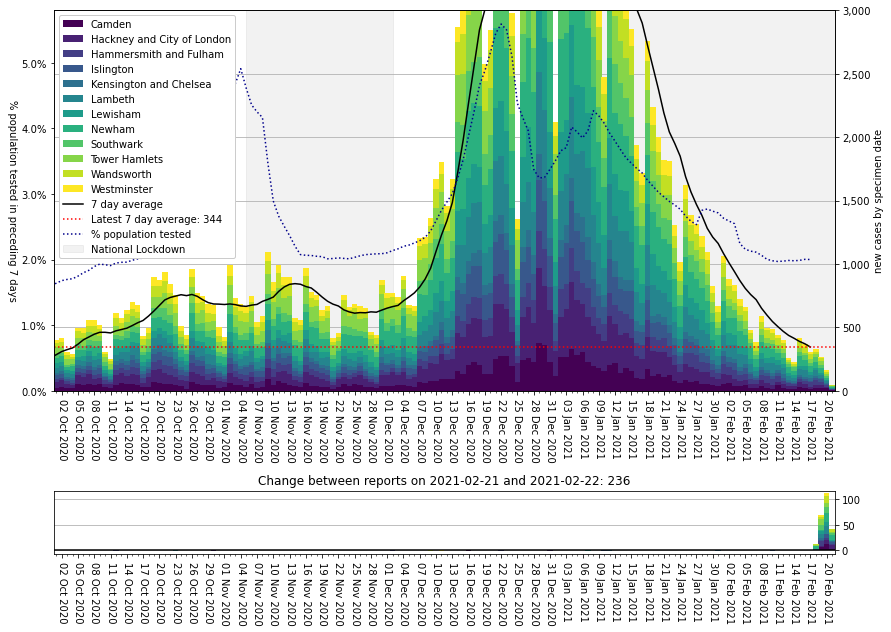

In [7]:
plot_areas(for_date, areas=london_areas, ylim=3_000)

In [8]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [9]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000150,Corby,321.249550,232.0,2021-02-21
E06000031,Peterborough,241.769217,489.0,2021-02-21
E06000017,Rutland,230.420517,92.0,2021-02-21
E06000016,Leicester,226.975021,804.0,2021-02-21
E08000028,Sandwell,225.300655,740.0,2021-02-21
E07000199,Tamworth,222.958173,171.0,2021-02-21
E06000002,Middlesbrough,217.052064,306.0,2021-02-21
E07000123,Preston,215.181472,308.0,2021-02-21
E07000156,Wellingborough,214.535737,171.0,2021-02-21


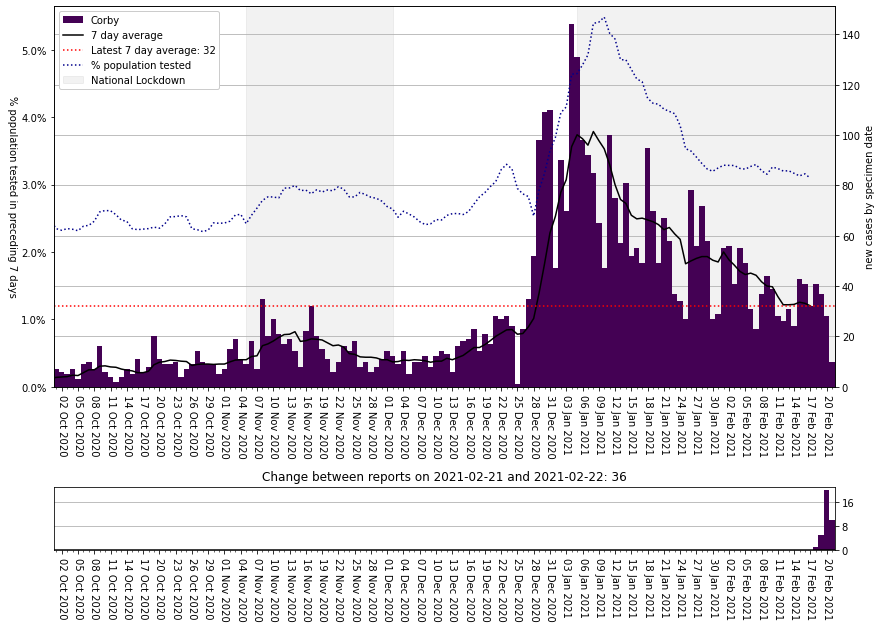

In [10]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [11]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,153.439784,1752.0,2021-02-21
E08000035,Leeds,148.649858,1179.0,2021-02-21
E08000032,Bradford,196.007233,1058.0,2021-02-21
E08000003,Manchester,155.917071,862.0,2021-02-21
S12000049,Glasgow City,131.570634,833.0,2021-02-21
E06000016,Leicester,226.975021,804.0,2021-02-21
E08000034,Kirklees,172.583546,759.0,2021-02-21
E08000028,Sandwell,225.300655,740.0,2021-02-21
E08000012,Liverpool,140.550395,700.0,2021-02-21


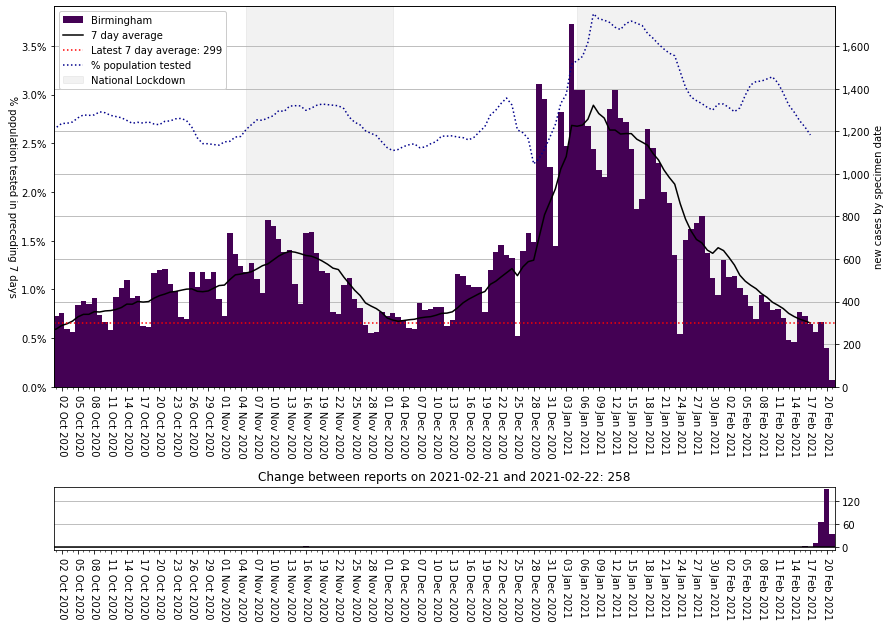

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.6
phe_max = 0.35

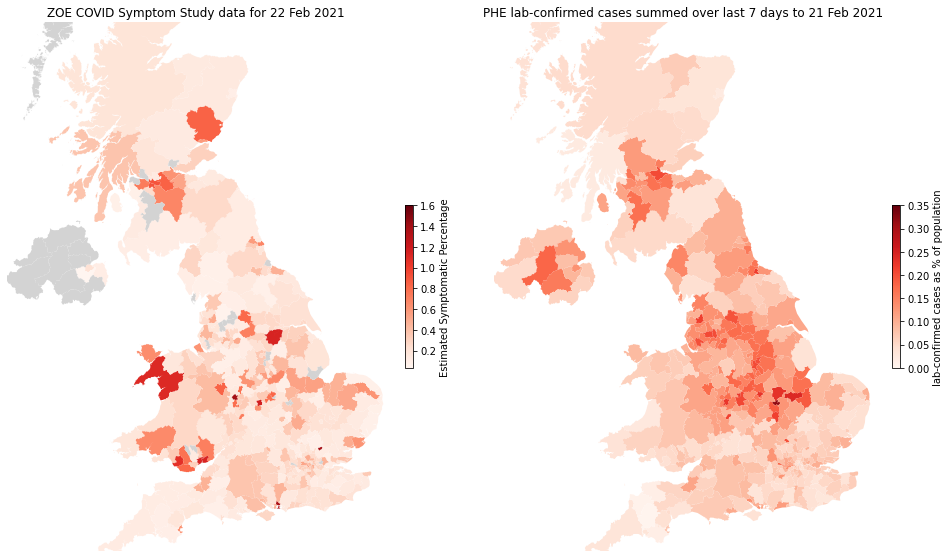

In [14]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [15]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

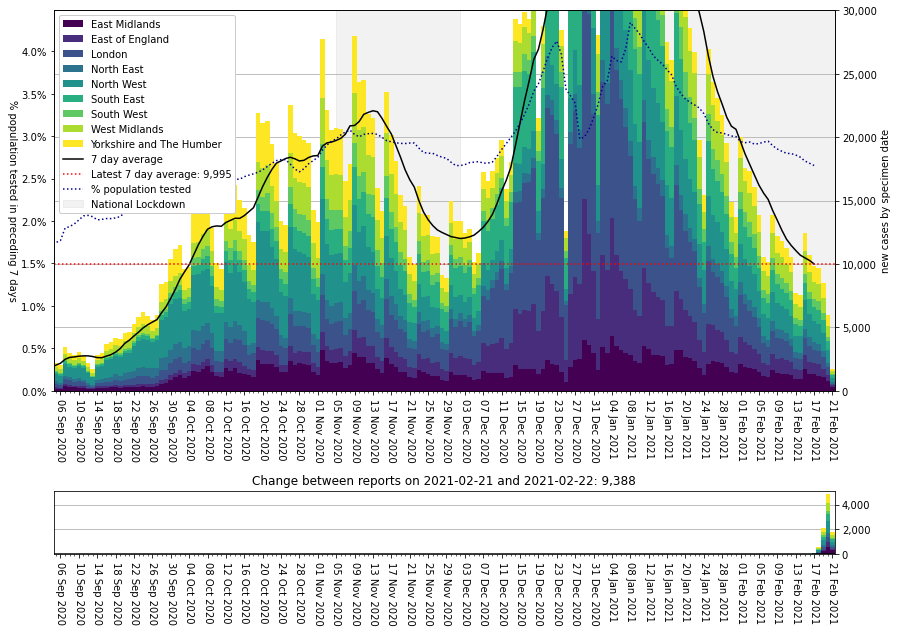

In [16]:
plot_areas(for_date, area_type=region, ylim=30_000, earliest='2020-09-05')

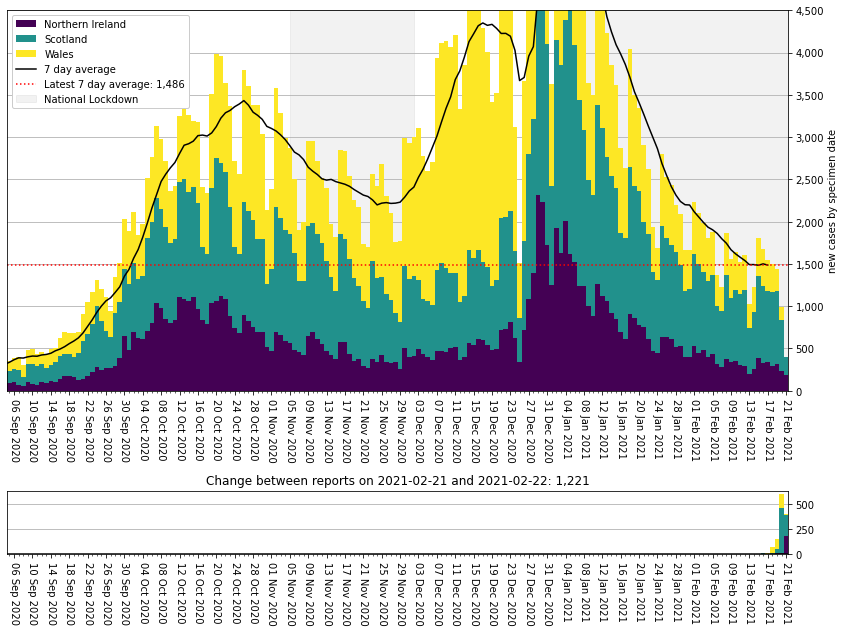

In [17]:
plot_areas(for_date, 'cases_devolved', ylim=4_500, diff_ylims=None, earliest='2020-09-05')